<a href="https://colab.research.google.com/github/musinaa/Regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("auto_insurance_sweden.csv")
df

,claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [ ]:
df.shape

(63, 2)

In [ ]:
df.isnull().sum()

claims     0
payment    0
dtype: int64

In [4]:
import statsmodels.api as stats

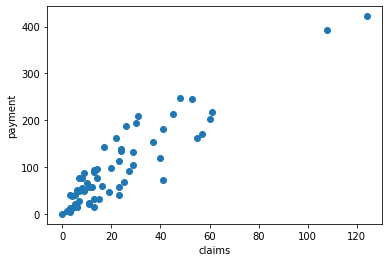

In [5]:
plt.scatter(df.claims,df.payment)
plt.xlabel("claims")
plt.ylabel("payment")
plt.show()


In [6]:
y=df.payment
x=stats.add_constant(df.claims)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
model_insurance=stats.OLS(y,x)
result_insurance=model_insurance.fit()

In [8]:
print(result_insurance.summary())

                            OLS Regression Results                            
Dep. Variable:                payment   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           2.05e-25
Time:                        09:28:18   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

In [9]:
intercept_insurance=result_insurance.params[0]
claims_coeff=result_insurance.params[1]
ssr_insurance=result_insurance.ssr

AttributeError: ignored

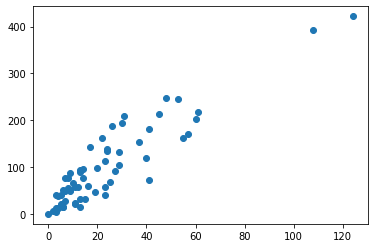

In [11]:
x_synthetic=np.linspace(0,df.claims.max(),50)
y_pred_insurance=claims_coeff*x_synthetic+intercept_insurance
plt.scatter(df.claims,df.payment,label='observed')
plt.plt(x_synthetic,y_pred_insurance,color='k',ls='--',label='Model')